<h1>TD 21 Routage dans un réseau correction

In [1]:
# /!\ Travail à rendre; consulter Pronote pour la date de rendu
# Repectez-bien la convention de nommage de votre TD: exemple TD21_Routage_dans_un_reseau_Marc_Defernez.ipynb
# il doit être facile de retrouver vos nom et prénom

# Votre nom ici: Darbé
# Votre prénom ici: Nathan

## Le modèle OSI
| n°  | Couche | Norme (exemple) |
| --- | --- | --- |
| 7   | Application | Web |
| 6   | Présentation | HTML/XML |
| 5   | Session | HTTP/HTTPS |
| 4   | Transport | TCP |
| 3   | Réseau | IP  |
| 2   | Liaison | Ethernet |
| 1   | Physique | RJ45 |

1. **La couche physique:** il y transite des suites de bits, c'est à dire des éléments pouvant se traduire par 0 ou 1. Elle peut-être constitué de supports variées : fils de cuivre, ondes radio ou fibre optique. Un problème sur cette couche correspond à un problème dans le monde physique.

2. **La couche de liaison:** il y transite des trames,c'est à dire des regroupement de bits. Ces trames peuvent être reconnues par certains équipements comme les switches. La norme désormais majoritaire de trame est Ethernet et on utilise essentiellement de la commutation de trames (avec un commutateur ou switch). Cette commutation à ce niveau n'est possible que sur des petits réseaux.

3. **La couche de réseau:** il y transite des paquets qui permettent réellement de parler de réseau. Ici nos paquets seront de type Internet Protocol. Cette couche doit prendre en charge trois fonctions :
* le contrôle de flux 
* le routage 
* l'adressage 

4. **La couche de transport:** on achemine des messages, c'est à dire des données utiles pour les utilisateurs finaux . On parle de datagramme TCP ou UDP, ou encore de paquet ICMP.

5. **La couche de session:** on gère les connexions, c'est à dire un ensemble de paquets permettant la connexion entre deux éléments du réseaux. Il s'agit souvent de ce qu'on appelle «protocoles applicatifs» correspondant à des protocoles comme SSH, HTTP/HTTPS, IMAP, SMTP, … Dans cette couche, on gère l'établissement de la session.

6. **La couche de présentation:** on gère la syntaxe utilisée pour communiquer. Par exemple, la syntaxe pour communiquer des pages WEB est constituée de «verbes» comme GET, … 

7. **La couche d'application:** on gère la sémantique de l'échange, c'est à dire le sens que l'on veut lui donner.




On peut simplifier le modèle par:<br><br>
    1
Application (Application web)


2
Transport (TCP)


3
internet (IP)


4
Physique (Ethernet et réseau Physique)

Sur un réseau, on distingue plusieurs types d'adresses :

les adresses MAC (Media Access Control), sur la couche 2 du modèle OSI.
les adresses IP (Internet Protocol), sur la couche 3 du modèle OSI.

Une adresse MAC est un ensemble de 6 nombres hexadécimaux à deux chiffres de
la forme xx:xx:xx:xx:xx:xx
Les 3 à 4 premiers chiffres identifient un fabriquant et le reste identifie (comme un numéro de produit) l'équipement. On peut utiliser un site comme https://maclookup.app/ pour trouver le nom du fabriquant.

L'adresse MAC est celle présente dans une trame Ether sur la couche 2 du modèle OSI. C'est celle-ci qui est reconnue par les switchs.
Pour les adresses IP, on peut distinguer IPv4 avec des adresses codées avec 4 octets et les adresses IPv6 codées avec 8 blocs de 2 octets.


**Notion de Route**

Un ordinateur peut être directement connecté à certains ordinateurs (couche 1), mais pas à tous. Si on choisi bien quels ordinateurs sont connectés (couche 2), il est alors possible d'envoyer des messages d'un ordinateur à n'importe quel autre ordinateur en demandant si l'on demande aux autres ordinateurs de transférer les messages (couche 3 et 4). La **connection** peut être **directe** ou **indirecte**.

**TCP/IP**

**Le protocole IP** permet d’attribuer à chaque machine une adresse IP unique pour l’identifier sur le réseau.
**Le protocole TCP** permet d’assurer la communication de l’information en la découpant en paquets, et en s’assurant que tous les paquets sont reçus et conformes à l’information envoyée, dans le cas ou un paquet est perdu, il le redemande.


**Table de routage**
Lorsqu’un routeur reçoit un paquet celui-ci comporte une adresse IP de destination. Pour savoir dans quelle direction envoyer le paquet, chaque routeur possède une table de routage.

Une table de routage est un tableau indiquant pour chaque réseau de destination(connu à partir de l’IP de la destination), quelle interface réseau on peut utiliser en lui associant également une métrique qui mesure la «distance» séparant le routeur du réseau de destination.


In [27]:
# Exercice 1: Creer une classe ordinateur 
# Il est possible de pouvoir lui attribuer un nom exemple: PC ou Routeur ou encore smartphone ...
# On doit pouvoir lui attribuer une adresse mac et une adresse IP
# Il doit être capable de gérer une table de routage (une liste)

class Ordinateur:
    def __init__(self, nom = "", mac = "", ip = "", table_de_routage = [] ):
        self.nom = nom
        self.mac = mac
        self.ip = ip
        self.table_de_routage = table_de_routage

    def afficher_ordi(self):
        print ("Nom: ", self.nom , "IP: " , self.ip ) # à compléter


In [28]:
ordi_nathan = Ordinateur("ordi_nathan" ,"C1:00:0C:C8:A2:AC", "192.168.1.10", )

In [29]:
print(ordi_nathan.afficher_ordi() )

Nom:  ordi_nathan IP:  192.168.1.10
None


**Le protocole RIP**

C’était le premier protocole utilisé. le principe est d'associer chaque routeur en fonction du nombre de sauts minimal pour les joindre. C’est-à-dire le nombre minimal de routeurs à traverser. Au départ chaque routeur ne connait que les réseaux directement accessibles, avec une distance nulle.

Ensuite, toutes les 30 secondes, les réseaux envoient leurs tables de routages à leurs voisins directement accessibles, à la réception chaque routeur met à jour sa table de routage en associant à chaque destination la passerelle avec la plus courte distance en nombre de saut.Ce protocole n’est plus utilisé, car sur de grands réseaux il provoque un trafic important, et de plus il possède des failles de sécurité rendant ces réseaux vulnérables à certaines attaques.

In [30]:
# Exercice 2: Creer une classe reseau 
# On peut lui ajouter des ordinateurs
# On doit lui indiquer les connections entre les ordinateurs
# exemple: PC1 connecté avec Routeur1
#          PC2 connecté avec Routeur1
#          PC3 connecté avec Routeur1
#          PC4 connecté avec PC1 ect...

class Reseau:
    
    def __init__(self, liste_ordi = []):
        self.liste_ordi = liste_ordi

    def ajouter_ordi (self, ordi):
        self.liste_ordi.append(ordi)


In [31]:
reseau1 = Reseau([ordi_nathan])

In [32]:
ordi_B = Ordinateur("ordinateur_B" ,"C1:00:0C:C9:A1:AB", "192.168.1.12", )

In [33]:
reseau1.ajouter_ordi(ordi_B)

In [34]:
reseau1.liste_ordi

In [35]:
for ordi in reseau1.liste_ordi:
    print (ordi.afficher_ordi())

Nom:  ordi_nathan IP:  192.168.1.10
None
Nom:  ordinateur_B IP:  192.168.1.12
None


In [36]:
switch1 = Ordinateur("switch1" ,"C1:07:08:a9:A2:01", "192.168.1.110", )
reseau1.ajouter_ordi(switch1)
for ordi in reseau1.liste_ordi:
    print (ordi.afficher_ordi())

Nom:  ordi_nathan IP:  192.168.1.10
None
Nom:  ordinateur_B IP:  192.168.1.12
None
Nom:  switch1 IP:  192.168.1.110
None


In [19]:
import time
print("Cette phrase est sortie immédiatement.")
time.sleep(3)
print("Cette phrase sera sortie trois secondes plus tard.")

Cette phrase est sortie immédiatement.
Cette phrase sera sortie trois secondes plus tard.


In [37]:
# Exercice 3: Le protocole RIP
# Creer un classe RIP qui prend en argument un réseau et remplit les tables de routage des ordinateurs de type routeur
# Vous pourrez mettre à jour les tables toutes les 3 secondes au lieu des 30 réglementaires.
# Tester l'ensemble à l'aide du réseau ci-dessous et afficher la table de routage du routeur.
Liste_ip_ordi = ["192.168.3.1", "192.168.3.2", "192.168.1.1", "192.168.1.2", "192.168.2.2", "192.168.2.1", "192.168.0.3", "192.168.0.2", "192.168.0.1"]
Liste_mac_ordi = ["C1:07:08:a9:A2:09" ,"C1:07:08:a9:A2:08" ,"C1:07:08:a9:A2:07" ,"C1:07:08:a9:A2:06", "C1:07:08:a9:A2:05" ,"C1:07:08:a9:A2:04", "C1:07:08:a9:A2:03", "C1:07:08:a9:A2:02" , "C1:07:08:a9:A2:01"]
#reseau1 = Reseau([])
len(Liste_mac_ordi )

reseau0 = Reseau([])
reseau1 = Reseau([])
reseau2 = Reseau([])
reseau3 = Reseau([])

for i in range (9):
    if "192.168.3" in Liste_ip_ordi[i]:
        reseau3.ajouter_ordi(Ordinateur(Liste_ip_ordi[i] ,Liste_mac_ordi[i], Liste_ip_ordi[i] ))
    elif "192.168.2" in Liste_ip_ordi[i]:
        reseau2.ajouter_ordi(Ordinateur(Liste_ip_ordi[i] ,Liste_mac_ordi[i], Liste_ip_ordi[i] ))
    elif "192.168.1" in Liste_ip_ordi[i]:
        reseau1.ajouter_ordi(Ordinateur(Liste_ip_ordi[i] ,Liste_mac_ordi[i], Liste_ip_ordi[i] ))
    else :
        reseau0.ajouter_ordi(Ordinateur(Liste_ip_ordi[i] ,Liste_mac_ordi[i], Liste_ip_ordi[i] ))
        

In [38]:
for ordi in reseau0.liste_ordi:
    print (ordi.afficher_ordi())

Nom:  192.168.0.3 IP:  192.168.0.3
None
Nom:  192.168.0.2 IP:  192.168.0.2
None
Nom:  192.168.0.1 IP:  192.168.0.1
None


In [39]:
for ordi in reseau1.liste_ordi:
    print (ordi.afficher_ordi())

Nom:  192.168.1.1 IP:  192.168.1.1
None
Nom:  192.168.1.2 IP:  192.168.1.2
None


![reseau](https://framagit.org/MarcDefernez/marc_defernez_nsi/-/raw/main/Terminale/21_Routage_dans_un_reseau/reseau_routage.png)

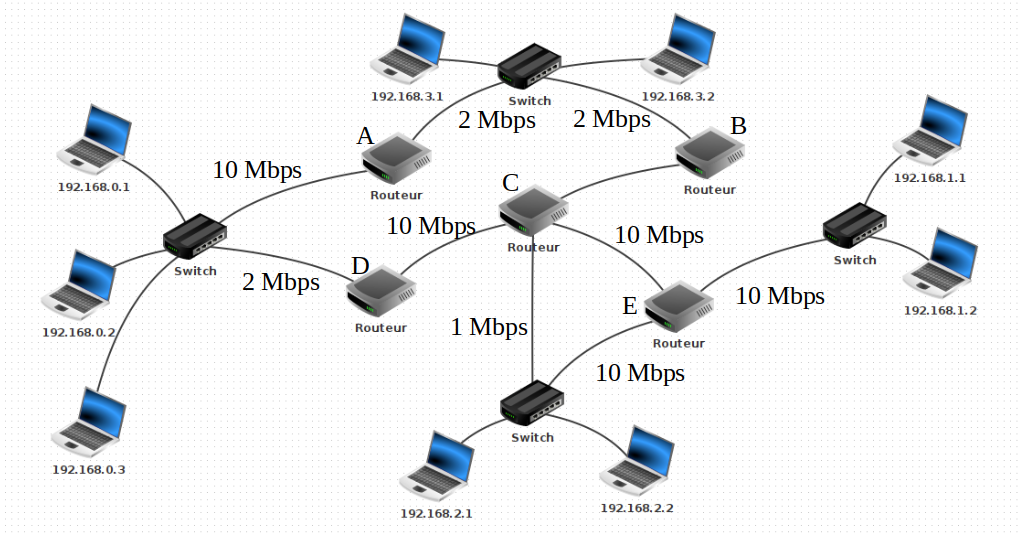

In [24]:
from IPython import display
display.Image("https://framagit.org/MarcDefernez/marc_defernez_nsi/-/raw/main/Terminale/21_Routage_dans_un_reseau/reseau_ospf.png")


**Le protocole OSPF**

Contrairment au protocole RIP qui voit seulement ses voisins directs, avec le protocole OSPF, les routeurs ont une visibilité globale du réseau.

La métrique utilisée n’est plus le nombre de sauts, mais le coût de la liaison. Celui-ci tient compte du débit binaire de chaque liaison en bits par seconde.

On définit le coût par l’expression: coût = 10^8 / débit avec le débit exprimé en Mbps Méga bits par secondes.
    
On peut représenter le réseau par un graphe dans laquelle les routeurs et les switchs sont des noeuds et les liaisons des arêtes étiquetées avec des coûts.

On applique alors l’algorithme de Djikstra pour trouver le plus court chemin. https://fr.wikipedia.org/wiki/Algorithme_de_Dijkstra

![wiki](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif)

In [9]:
# Exercice 3: Le protocole OSPF
# Répondre juste aux questions (pas de code Python)
"""
    En vous basant sur le protocole OSPF (métrique = somme des coûts), déterminez la table de routage du routeur A.

    Quel est, d’après la table de routage construite ci-dessus, le chemin qui sera emprunté par un paquet pour aller d’une machine ayant pour adresse IP 192.168.0.1 à une machine ayant pour adresse IP 192.168.1.2 ?
"""
Q1: Switch 0 : 10 Mbps; 192.168.0.1 : 10 Mbps; 192.168.0.2 : 10 Mbps; 192.168.0.3 : 10 Mbps;
    Routeur D : 12 Mbps; Switch 3 : 2 Mbps; 192.168.3.1 : 2 Mbps; 192.168.3.2 : 2 Mbps;
    Routeur B : 4 Mbps; Routeur C : 4 Mbps; Switch 2 : 5 Mbps; 192.168.2.1 : 5 Mbps;
    192.168.2.2 : 5 Mbps; Routeur E: 14 Mbps; Switch 1 : 24 Mbps; 192.168.1.1 : 24 Mbps; 192.168.1.2 : 24 Mbps
    
Q2: Le paquet empruntera le chemin ci-dessous : 
    192.168.0.1 --> Switch 0 --> Routeur D --> Routeur C --> Routeur E --> Switch 1 --> 192.168.1.2


'\n    En vous basant sur le protocole OSPF (métrique = somme des coûts), déterminez la table de routage du routeur A.\n\n    Quel est, d’après la table de routage construite ci-dessus, le chemin qui sera emprunté par un paquet pour aller d’une machine ayant pour adresse IP 192.168.0.1 à une machine ayant pour adresse IP 192.168.1.2 ?\n'

![ospf](https://framagit.org/MarcDefernez/marc_defernez_nsi/-/raw/main/Terminale/21_Routage_dans_un_reseau/reseau_ospf.png) 